# 1 - Optical response of the graphene family

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import integrate

## 1.1 Zero-temperature optical response

In [5]:
def sigma_xx(E_freq,E_dis,elE,Lambda,mu):
    Omega = E_dis - E_freq*1j
    sum = 0
    for eta in (-1,1):
        for s in (-1,1):
            Gap = (eta*s - elE - eta*Lambda)
            M = np.maximum(np.absolute(Gap),np.absolute(mu))
            if mu == 0 and Gap == 0:
                intra = 0
                inter1 = 0
                inter2 = 1/4
            elif mu == 0 and Gap != 0:
                intra = 0
                inter1 = (Gap**2)/(np.pi*Omega*M)
                inter2 = 1/(2*np.pi)*(1 - (2*Gap/Omega)**2)*np.arctan(Omega/(2*M))  
            elif mu != 0 and Gap == 0:
                intra = np.heaviside(np.absolute(mu) - np.absolute(Gap),0.5)*(mu**2 - Gap**2)/(np.pi*Omega*np.absolute(mu))
                inter1 = 0
                inter2 = 1/(2*np.pi)*np.arctan(Omega/(2*M))
            else:
                intra = np.heaviside(np.absolute(mu) - np.absolute(Gap),0.5)*(mu**2 - Gap**2)/(np.pi*Omega*np.absolute(mu))
                inter1 = (Gap**2)/(np.pi*Omega*M)
                inter2 = 1/(2*np.pi)*(1 - (2*Gap/Omega)**2)*np.arctan(Omega/(2*M))
                    
            sum += intra + inter1 + inter2
            
    return sum

def sigma_xy(E_freq,E_dis,elE,Lambda,mu):
    Omega = E_dis - E_freq*1j
    sum = 0
    for eta in (-1,1):
        for s in (-1,1):
            Gap = (eta*s - elE - eta*Lambda)
            M = np.maximum(np.absolute(Gap),np.absolute(mu))
            if Gap == 0:
                inter = 0
            else:
                inter = 2*eta*Gap*np.arctan(Omega/(2*M))/(np.pi*Omega)
            sum += inter
            
    return sum


In [2]:
def sigma_xx_xy(E_freq,E_dis,elE,Lambda,mu):
    Omega = E_dis - E_freq*1j
    sumxx = 0
    sumxy = 0
    for eta in (-1,1):
        for s in (-1,1):
            Gap = eta*s - elE - eta*Lambda
            M = np.maximum(np.absolute(Gap),np.absolute(mu))
            if mu == 0 and Gap == 0:
                intra = 0
                inter1 = 0
                inter2 = 1/4
            elif mu == 0 and Gap != 0:
                intra = 0
                inter1 = (Gap**2)/(np.pi*Omega*M)
                inter2 = 1/(2*np.pi)*(1 - (2*Gap/Omega)**2)*np.arctan(Omega/(2*M))  
            elif mu != 0 and Gap == 0:
                intra = np.heaviside(np.absolute(mu) - np.absolute(Gap),0.5)*(mu**2 - Gap**2)/(np.pi*Omega*np.absolute(mu))
                inter1 = 0
                inter2 = 1/(2*np.pi)*np.arctan(Omega/(2*M))
            else:
                intra = np.heaviside(np.absolute(mu) - np.absolute(Gap),0.5)*(mu**2 - Gap**2)/(np.pi*Omega*np.absolute(mu))
                inter1 = (Gap**2)/(np.pi*Omega*M)
                inter2 = 1/(2*np.pi)*(1 - (2*Gap/Omega)**2)*np.arctan(Omega/(2*M))
            if Gap == 0:
                inter3 = 0
            else:
                inter3 = 2*eta*Gap*np.arctan(Omega/(2*M))/(np.pi*Omega)
                
            sumxy += inter3
            sumxx += intra + inter1 + inter2
                    
    return np.array([sumxx,sumxy])

## 1.2 - Finite temperature optical response

In [64]:
def sigma_xxT(E_freq,E_dis,elE,Lambda,kbT,mu):
    E = np.arange(-20*kbT,20*kbT,0.001*kbT) + mu
    sigmaxxT = np.zeros(E_freq.size, dtype=np.complex)
    for i in range(0,E_freq.size):
        Omega = E_dis - E_freq[i]*1j
        sigmaE = 0
        for eta in (-1,1):
            for s in (-1,1):
                Gap = (eta*s - elE - eta*Lambda)
                M = np.maximum(np.absolute(Gap),np.absolute(E))
                if Gap == 0:
                    intra = np.where(E == 0, 0, np.heaviside(np.absolute(E) - np.absolute(Gap),0.5)*(E**2 - Gap**2)/(np.pi*Omega*np.absolute(E)))
                    inter1 = 0
                    inter2 = np.where(E == 0, 1/4, 1/(2*np.pi)*np.arctan(Omega/(2*M)))
                else:
                    intra = np.where(E == 0, 0, np.heaviside(np.absolute(E) - np.absolute(Gap),0.5)*(E**2 - Gap**2)/(np.pi*Omega*np.absolute(E)))
                    inter1 = (Gap**2)/(np.pi*Omega*M)
                    inter2 = 1/(2*np.pi)*(1 - (2*Gap/Omega)**2)*np.arctan(Omega/(2*M)) 
                
                sigmaE += intra + inter1 + inter2
            
        den = 4*kbT*(np.cosh((E - mu)/(2*kbT)))**2
        sigmaxxT[i] = integrate.simps(sigmaE/den,E)
            
    return sigmaxxT

def sigma_xyT(E_freq,E_dis,elE,Lambda,kbT,mu):
    sigmaxyT = np.zeros(E_freq.size, dtype=np.complex)
    E = np.arange(-20*kbT,20*kbT,0.001*kbT) + mu
    for i in range(0,E_freq.size):
        Omega = E_dis - E_freq[i]*1j
        sigmaE = 0
        for eta in (-1,1):
            for s in (-1,1):
                Gap = (eta*s - elE - eta*Lambda)
                M = np.maximum(np.absolute(Gap),np.absolute(E))
                if Gap == 0:
                    inter = 0
                else:
                    inter = 2*eta*Gap*np.arctan(Omega/(2*M))/(np.pi*Omega)
                sigmaE += inter
            
        den = 4*kbT*(np.cosh((E - mu)/(2*kbT)))**2
        sigmaxyT[i] = integrate.simps(sigmaE/den,E)
            
    return sigmaxyT


In [69]:
def sigma_xx_xyT(E_freq,E_dis,elE,Lambda,kbT,mu):
    E = np.arange(-20*kbT,20*kbT,0.001*kbT) + mu
    sigmaxxT = np.zeros(E_freq.size, dtype=np.complex)
    sigmaxyT = np.zeros(E_freq.size, dtype=np.complex)
    for i in range(0,E_freq.size):
        Omega = E_dis - E_freq[i]*1j
        sigmaExx = 0
        sigmaExy = 0
        for eta in (-1,1):
            for s in (-1,1):
                Gap = (eta*s - elE - eta*Lambda)
                M = np.maximum(np.absolute(Gap),np.absolute(E))
                if Gap == 0:
                    intra = np.where(E == 0, 0, np.heaviside(np.absolute(E) - np.absolute(Gap),0.5)*(E**2 - Gap**2)/(np.pi*Omega*np.absolute(E)))
                    inter1 = 0
                    inter2 = np.where(E == 0, 1/4, 1/(2*np.pi)*np.arctan(Omega/(2*M)))
                    inter3 = 0
                else:
                    intra = np.where(E == 0, 0, np.heaviside(np.absolute(E) - np.absolute(Gap),0.5)*(E**2 - Gap**2)/(np.pi*Omega*np.absolute(E)))
                    inter1 = (Gap**2)/(np.pi*Omega*M)
                    inter2 = 1/(2*np.pi)*(1 - (2*Gap/Omega)**2)*np.arctan(Omega/(2*M))
                    inter3 = 2*eta*Gap*np.arctan(Omega/(2*M))/(np.pi*Omega)
                
                sigmaExx += intra + inter1 + inter2
                sigmaExy += inter3
            
        den = 4*kbT*(np.cosh((E - mu)/(2*kbT)))**2
        sigmaxxT[i] = integrate.simps(sigmaExx/den,E)
        sigmaxyT[i] = integrate.simps(sigmaExy/den,E)
            
    return np.array([sigmaxxT,sigmaxyT])

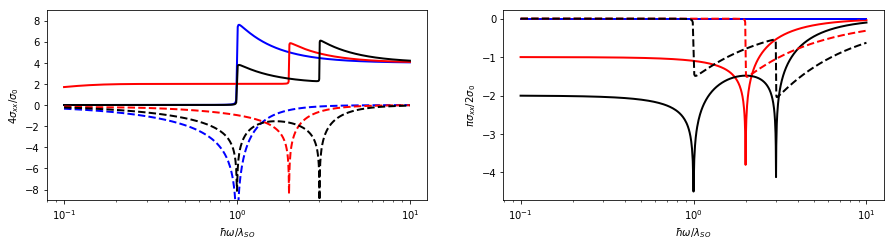

In [65]:
#Plotting the conductivity
Efreq = np.arange(0.1,10.01,0.01)

plt.figure(figsize=(15,3.5))

plt.subplot(121)
plt.semilogx(Efreq,4*np.real(sigma_xxT(Efreq,0.002,0,0,0.02,0)),color='blue',linewidth=2,label='$\Lambda/\lambda_{SO} = 0$')
plt.semilogx(Efreq,4*np.real(sigma_xxT(Efreq,0.002,0,1,0.02,0)),color='red',linewidth=2,label='$\Lambda/\lambda_{SO} = 1$')
plt.semilogx(Efreq,4*np.real(sigma_xxT(Efreq,0.002,0,2,0.02,0)),color='black',linewidth=2,label='$\Lambda/\lambda_{SO} = 2$')
plt.semilogx(Efreq,4*np.imag(sigma_xxT(Efreq,0.002,0,0,0.02,0)),color='blue',linestyle='dashed',linewidth=2,label='$\Lambda/\lambda_{SO} = 0$')
plt.semilogx(Efreq,4*np.imag(sigma_xxT(Efreq,0.002,0,1,0.02,0)),color='red',linestyle='dashed',linewidth=2,label='$\Lambda/\lambda_{SO} = 1$')
plt.semilogx(Efreq,4*np.imag(sigma_xxT(Efreq,0.002,0,2,0.02,0)),color='black',linestyle='dashed',linewidth=2,label='$\Lambda/\lambda_{SO} = 2$')
plt.xlabel('$\hbar\omega/\lambda_{SO}$')
plt.ylabel('$4\sigma_{xx}/\sigma_0$')
plt.ylim(-9,9)

plt.subplot(122)
plt.semilogx(Efreq,np.pi*np.real(sigma_xyT(Efreq,0.002,0,0,0.02,0))/2,color='blue',linewidth=2,label='$\Lambda/\lambda_{SO} = 0$')
plt.semilogx(Efreq,np.pi*np.real(sigma_xyT(Efreq,0.002,0,1,0.02,0))/2,color='red',linewidth=2,label='$\Lambda/\lambda_{SO} = 1$')
plt.semilogx(Efreq,np.pi*np.real(sigma_xyT(Efreq,0.002,0,2,0.02,0))/2,color='black',linewidth=2,label='$\Lambda/\lambda_{SO} = 2$')
plt.semilogx(Efreq,np.pi*np.imag(sigma_xyT(Efreq,0.002,0,0,0.02,0))/2,color='blue',linestyle='dashed',linewidth=2,label='$\Lambda/\lambda_{SO} = 0$')
plt.semilogx(Efreq,np.pi*np.imag(sigma_xyT(Efreq,0.002,0,1,0.02,0))/2,color='red',linestyle='dashed',linewidth=2,label='$\Lambda/\lambda_{SO} = 1$')
plt.semilogx(Efreq,np.pi*np.imag(sigma_xyT(Efreq,0.002,0,2,0.02,0))/2,color='black',linestyle='dashed',linewidth=2,label='$\Lambda/\lambda_{SO} = 2$')
plt.xlabel('$\hbar\omega/\lambda_{SO}$')
plt.ylabel('$\pi\sigma_{xx}/2\sigma_0$')

plt.show()

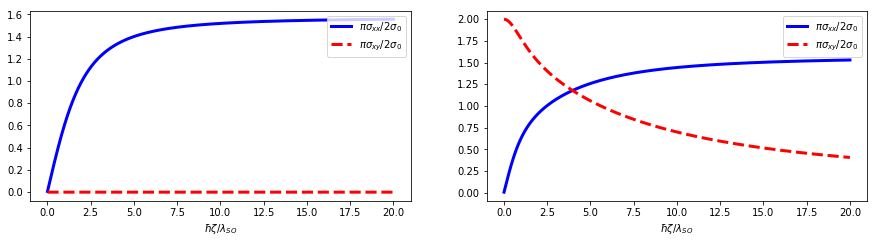

In [36]:
EfreqIm = np.arange(0.01,20.01,0.01)*1j

plt.figure(figsize=(15,3.5))

plt.subplot(121)
plt.plot(EfreqIm/1j,np.pi*sigma_xx(EfreqIm,0,0,0,0).real/2,color='blue',linewidth=3,label='$\pi\sigma_{xx}/2\sigma_0$')
plt.plot(EfreqIm/1j,np.pi*sigma_xy(EfreqIm,0,0,0,0).real/2,color='red',linestyle='dashed',linewidth=3,label='$\pi\sigma_{xy}/2\sigma_0$')
plt.xlabel('$\hbar\zeta/\lambda_{SO}$')
plt.legend(loc="upper right")

plt.subplot(122)
plt.plot(EfreqIm/1j,np.pi*sigma_xx(EfreqIm,0,0,-1.5,0).real/2,color='blue',linewidth=3,label='$\pi\sigma_{xx}/2\sigma_0$')
plt.plot(EfreqIm/1j,np.pi*sigma_xy(EfreqIm,0,0,-1.5,0).real/2,color='red',linestyle='dashed',linewidth=3,label='$\pi\sigma_{xy}/2\sigma_0$')
plt.xlabel('$\hbar\zeta/\lambda_{SO}$')
plt.legend(loc="upper right")

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


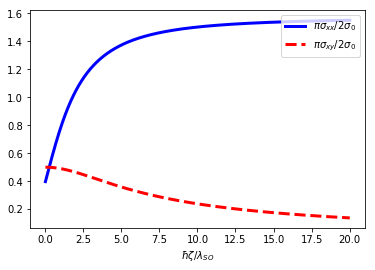

In [37]:
EfreqIm = np.arange(0,20.01,0.01)*1j


plt.plot(EfreqIm/1j,np.pi*sigma_xx(EfreqIm,0,1/2,-1/2,0).real/2,color='blue',linewidth=3,label='$\pi\sigma_{xx}/2\sigma_0$')
plt.plot(EfreqIm/1j,np.pi*sigma_xy(EfreqIm,0,1/2,-1/2,0).real/2,color='red',linestyle='dashed',linewidth=3,label='$\pi\sigma_{xy}/2\sigma_0$')
plt.xlabel('$\hbar\zeta/\lambda_{SO}$')
plt.legend(loc="upper right")

plt.show()

# 2 - Zero-temperature Casimir force

## 2.1 - Lifshitz formula for two identical materials

In [25]:
path_conductivities = 'conductivities'
hbar = (6.62607*10**(-34))/(2*np.pi)
e = 1.602177*10**(-19)
epsilon_0 = 8.85419*10**(-12)
mu_0 = 4*np.pi*10**(-7)
c = np.sqrt(1/(epsilon_0*mu_0))
alpha = e**2/(4*np.pi*epsilon_0*hbar*c)
sigma0 = alpha*c/4

# Fórmula de Lifshitz para a energia de Casimir por unidade de área
def ECasgf(a,E_dis,elE,Lambda,mu):
    csi = np.append(np.arange(np.finfo(float).eps,0.01/a,0.00001/a),np.arange(0.01/a,6/a,0.001/a))
    sigmaxx = sigma0*np.interp(csi,np.append(np.arange(0.000001,10,0.01),np.arange(10.1,100,0.1)),np.real(np.load(os.path.join(path_conductivities, 'G='+str(E_dis)+'Ez='+str(elE)+'L='+str(Lambda)+'T=0mu='+str(mu)+'.npy'))[0]))
    sigmaxy = sigma0*np.interp(csi,np.append(np.append(np.arange(0.000001,10,0.01),np.arange(10.1,100,0.1)),200),np.append(np.real(np.load(os.path.join(path_conductivities, 'G='+str(E_dis)+'Ez='+str(elE)+'L='+str(Lambda)+'T=0mu='+str(mu)+'.npy'))[1]),0))
    csi_integral = np.zeros(csi.size)
    for i in range(0,csi.size):
        kcsi = np.sqrt(csi[i]**2 + csi**2)/csi
        delta = 1 + 2*np.pi*sigmaxx*(kcsi + 1/kcsi)/c + (sigmaxx**2 + sigmaxy**2)*(2*np.pi/c)**2
        Rss = -(2*np.pi/(c*delta))*(sigmaxx/kcsi + (2*np.pi/c)*(sigmaxx**2 + sigmaxy**2))
        Rsp = 2*np.pi*sigmaxy/(c*delta)
        Rpp = (2*np.pi/(c*delta))*(sigmaxx*kcsi + (2*np.pi/c)*(sigmaxx**2 + sigmaxy**2))
        det = (1 - (Rss**2 - Rsp**2)*np.exp(-2*np.sqrt(csi[i]**2 + csi**2)*a))*(1 - (Rpp**2 - Rsp**2)*np.exp(-2*np.sqrt(csi[i]**2 + csi**2)*a)) + ((Rss*Rsp - Rsp*Rpp)*np.exp(-2*np.sqrt(csi[i]**2 + csi**2)*a))**2
        integrand = csi[i]*np.log(det)
        csi_integral[i] = integrate.simps(integrand,csi)        
    integral = integrate.simps(csi_integral,csi)
    return -(8*a**3)*integral/(np.pi*alpha)

## 2.2 Approximated expressions

In [8]:
def E00(a,elE,Lambda):
    InvDelta = 0
    for eta in (-1,1):
        for s in (-1,1):
            Gap = -eta*s + elE + eta*Lambda
            if Gap != 0:
                InvDelta += 1/np.absolute(Gap)
    
    Delta = 1/InvDelta
    num = alpha
    den = 5*np.pi*(a*Delta)**2
    return num/den

def DeltaE00(a,E_dis,elE,Lambda):
    InvDelta = 0
    for eta in (-1,1):
        for s in (-1,1):
            Gap = -eta*s + elE + eta*Lambda
            if Gap != 0:
                InvDelta += 1/np.absolute(Gap)
    
    Delta = 1/InvDelta
    num = E_dis
    den = 3*np.pi*Delta
    array = np.zeros(a.size)
    array += num/den
    return array
                

In [26]:
path_casimirdistance = 'casimirenergies'

a = np.append(np.arange(0.01,0.1,0.005),np.append(np.arange(0.1,1,0.05),np.arange(1,11,0.5)))
E = np.zeros(a.size)
for i in range(0,a.size):
    E[i] =  ECasgf(a[i],0,1.5,0,0)
    
np.save(os.path.join(path_casimirdistance, 'G=0Ez=1.5L=0T=0mu=0.npy'),E)

In [6]:
path_casimirdistance = 'casimirenergies'

a = np.append(np.arange(0.01,0.1,0.005),np.append(np.arange(0.1,1,0.05),np.arange(1,11,0.5)))
E = np.zeros(a.size)
for i in range(0,a.size):
    E[i] =  ECasgf(a[i],0.025,1.5,0,0)
    
np.save(os.path.join(path_casimirdistance, 'G=0.025Ez=1.5L=0T=0mu=0.npy'),E)

In [7]:
path_casimirdistance = 'casimirenergies'

a = np.append(np.arange(0.01,0.1,0.005),np.append(np.arange(0.1,1,0.05),np.arange(1,11,0.5)))
E = np.zeros(a.size)
for i in range(0,a.size):
    E[i] =  ECasgf(a[i],0.25,1.5,0,0)
    
np.save(os.path.join(path_casimirdistance, 'G=0.25Ez=1.5L=0T=0mu=0.npy'),E)

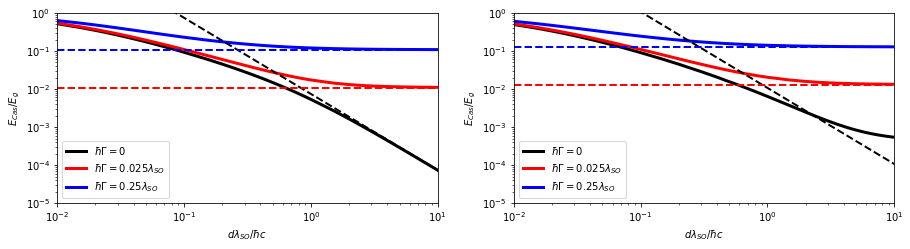

In [27]:
path_casimir = 'casimirenergies'
a = np.append(np.arange(0.01,0.1,0.005),np.append(np.arange(0.1,1,0.05),np.arange(1,11,0.5)))
E1 = np.load(os.path.join(path_casimir, 'G=0Ez=0L=0T=0mu=0.npy'))
E2 = np.load(os.path.join(path_casimir, 'G=0.025Ez=0L=0T=0mu=0.npy'))
E3 = np.load(os.path.join(path_casimir, 'G=0.25Ez=0L=0T=0mu=0.npy'))
E5 = np.load(os.path.join(path_casimir, 'G=0Ez=1.5L=0T=0mu=0.npy'))
E6 = np.load(os.path.join(path_casimir, 'G=0.025Ez=1.5L=0T=0mu=0.npy'))
E7 = np.load(os.path.join(path_casimir, 'G=0.25Ez=1.5L=0T=0mu=0.npy'))

E1a = E00(a,0,0)
E2a = DeltaE00(a,0.025,0,0)
E3a = DeltaE00(a,0.25,0,0)
E5a = E00(a,1.5,0)
E6a = DeltaE00(a,0.025,1.5,0)
E7a = DeltaE00(a,0.25,1.5,0)

plt.figure(figsize=(15,3.5))

plt.subplot(121)
plt.loglog(a,E1,color='black',linewidth=3,label='$\hbar\Gamma = 0$')
plt.loglog(a,E2,color='red',linewidth=3,label='$\hbar\Gamma = 0.025\lambda_{SO}$')
plt.loglog(a,E3,color='blue',linewidth=3,label='$\hbar\Gamma = 0.25\lambda_{SO}$')
plt.loglog(a,E1a,color='black',linewidth=2,linestyle='dashed')
plt.loglog(a,E2a,color='red',linewidth=2,linestyle='dashed')
plt.loglog(a,E3a,color='blue',linewidth=2,linestyle='dashed')
plt.xlabel('$d\lambda_{SO}/\hbar c$')
plt.ylabel('$E_{Cas}/E_g$')
plt.legend(loc="lower left")
plt.xlim(0.01,10)
plt.ylim(0.00001,1)

plt.subplot(122)
plt.loglog(a,E5,color='black',linewidth=3,label='$\hbar\Gamma = 0$')
plt.loglog(a,E6,color='red',linewidth=3,label='$\hbar\Gamma = 0.025\lambda_{SO}$')
plt.loglog(a,E7,color='blue',linewidth=3,label='$\hbar\Gamma = 0.25\lambda_{SO}$')
plt.loglog(a,E5a,color='black',linewidth=2,linestyle='dashed')
plt.loglog(a,E6a,color='red',linewidth=2,linestyle='dashed')
plt.loglog(a,E7a,color='blue',linewidth=2,linestyle='dashed')
plt.xlabel('$d\lambda_{SO}/\hbar c$')
plt.ylabel('$E_{Cas}/E_g$')
plt.legend(loc="lower left")
plt.xlim(0.01,10)
plt.ylim(0.00001,1)

plt.show()

In [50]:
path_casimirdistance = 'casimirenergies'

elE = np.arange(-2,2,0.02)
E = np.zeros(elE.size)
for i in range(0,elE.size):
    np.save(os.path.join(path_conductivities, 'G=0Ez='+str(elE[i])+'L=0T=0mu=0.npy'),sigma_xx_xy(np.append(np.arange(0.0001,10,0.01)*1j,np.arange(10.1,100,0.1)*1j),0,elE[i],0,0))
    E[i] =  ECasgf(1,0,elE[i],0,0)

np.save(os.path.join(path_casimirdistance, 'a=1G=0L=0T=0mu=0.npy'),E)

In [4]:
path_casimirdistance = 'casimirenergies'

elE = np.arange(0,2,0.02)
E = np.zeros(elE.size)
for i in range(0,elE.size):
    np.save(os.path.join(path_conductivities, 'G=0.025Ez='+str(elE[i])+'L=0T=0mu=0.npy'),sigma_xx_xy(np.append(np.arange(0.0001,10,0.01)*1j,np.arange(10.1,100,0.1)*1j),0.025,elE[i],0,0))
    E[i] =  ECasgf(1,0.025,elE[i],0,0)

np.save(os.path.join(path_casimirdistance, 'a=1G=0.025L=0T=0mu=0.npy'),E)

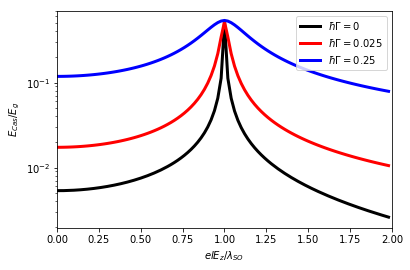

In [5]:
path_casimir = 'casimirenergies'
elE = np.arange(-2,2,0.02)
elE2 = np.arange(0,2,0.02)
E1 = np.load(os.path.join(path_casimir, 'a=1G=0L=0T=0mu=0.npy'))
E2 = np.load(os.path.join(path_casimir, 'a=1G=0.025L=0T=0mu=0.npy'))
E3 = np.load(os.path.join(path_casimir, 'a=1G=0.25L=0T=0mu=0.npy'))


plt.semilogy(elE,E1,color='black',linewidth=3,label='$\hbar\Gamma = 0$')
plt.semilogy(elE2,E2,color='red',linewidth=3,label='$\hbar\Gamma = 0.025$')
plt.semilogy(elE2,E3,color='blue',linewidth=3,label='$\hbar\Gamma = 0.25$')
plt.xlabel('$elE_z/\lambda_{SO}$')
plt.ylabel('$E_{Cas}/E_g$')
plt.legend(loc="upper right")
plt.xlim(0,2)

plt.show()

## 2.3 - Finite temperature Casimir force

In [78]:
path_conductivities = 'conductivities'
hbar = (6.62607*10**(-34))/(2*np.pi)
e = 1.602177*10**(-19)
epsilon_0 = 8.85419*10**(-12)
mu_0 = 4*np.pi*10**(-7)
c = np.sqrt(1/(epsilon_0*mu_0))
alpha = e**2/(4*np.pi*epsilon_0*hbar*c)
sigma0 = alpha*c/4

# Fórmula de Lifshitz para a energia de Casimir por unidade de área
def ECasgfT(a,E_dis,elE,Lambda,kbT,mu):
    kpar = np.append(np.arange(np.finfo(float).eps,0.01/a,0.00001/a),np.arange(0.01/a,6/a,0.001/a))
    csi = np.insert(np.arange(2*np.pi*kbT,6/a,2*np.pi*kbT),0,np.finfo(float).eps)
    sigmaxx = sigma0*np.interp(csi,np.append(np.arange(np.finfo(float).eps,10,0.01),np.arange(10.1,100,0.1)),np.real(np.load(os.path.join(path_conductivities, 'G='+str(E_dis)+'Ez='+str(elE)+'L='+str(Lambda)+'T='+str(kbT)+'mu='+str(mu)+'.npy'))[0]))
    sigmaxy = sigma0*np.interp(csi,np.append(np.append(np.arange(np.finfo(float).eps,10,0.01),np.arange(10.1,100,0.1)),200),np.append(np.real(np.load(os.path.join(path_conductivities, 'G='+str(E_dis)+'Ez='+str(elE)+'L='+str(Lambda)+'T='+str(kbT)+'mu='+str(mu)+'.npy'))[1]),0))
    integralsum = 0
    kcsi = np.sqrt(kpar**2 + csi[0]**2)/csi[0]
    delta = 1 + 2*np.pi*sigmaxx[0]*(kcsi + 1/kcsi)/c + (sigmaxx[0]**2 + sigmaxy[0]**2)*(2*np.pi/c)**2
    Rss = -(2*np.pi/(c*delta))*(sigmaxx[0]/kcsi + (2*np.pi/c)*(sigmaxx[0]**2 + sigmaxy[0]**2))
    Rsp = 2*np.pi*sigmaxy[0]/(c*delta)
    Rpp = (2*np.pi/(c*delta))*(sigmaxx[0]*kcsi + (2*np.pi/c)*(sigmaxx[0]**2 + sigmaxy[0]**2))
    det = (1 - (Rss**2 - Rsp**2)*np.exp(-2*np.sqrt(kpar**2 + csi[0]**2)*a))*(1 - (Rpp**2 - Rsp**2)*np.exp(-2*np.sqrt(kpar**2 + csi[0]**2)*a)) + ((Rss*Rsp - Rsp*Rpp)*np.exp(-2*np.sqrt(kpar**2 + csi[0]**2)*a))**2
    integrand = kpar*np.log(det)
    integralsum += integrate.simps(integrand,kpar)/2
    for n in range(1,csi.size):
        kcsi = np.sqrt(kpar**2 + csi[n]**2)/csi[n]
        delta = 1 + 2*np.pi*sigmaxx[n]*(kcsi + 1/kcsi)/c + (sigmaxx[n]**2 + sigmaxy[n]**2)*(2*np.pi/c)**2
        Rss = -(2*np.pi/(c*delta))*(sigmaxx[n]/kcsi + (2*np.pi/c)*(sigmaxx[n]**2 + sigmaxy[n]**2))
        Rsp = 2*np.pi*sigmaxy[n]/(c*delta)
        Rpp = (2*np.pi/(c*delta))*(sigmaxx[n]*kcsi + (2*np.pi/c)*(sigmaxx[n]**2 + sigmaxy[n]**2))
        det = (1 - (Rss**2 - Rsp**2)*np.exp(-2*np.sqrt(kpar**2 + csi[n]**2)*a))*(1 - (Rpp**2 - Rsp**2)*np.exp(-2*np.sqrt(kpar**2 + csi[n]**2)*a)) + ((Rss*Rsp - Rsp*Rpp)*np.exp(-2*np.sqrt(kpar**2 + csi[n]**2)*a))**2
        integrand = kpar*np.log(det)
        integralsum += integrate.simps(integrand,kpar)
            
    return -(16*kbT*a**3)*integralsum/alpha

In [86]:
path_conductivities = 'conductivities'
np.save(os.path.join(path_conductivities, 'G=0.0001Ez=0L=0T=0.001mu=0.npy'),sigma_xx_xyT(np.append(np.arange(np.finfo(float).eps,10,0.01)*1j,np.arange(10.1,100,0.1)*1j),0.0001,0,0,0.001,0))
np.save(os.path.join(path_conductivities, 'G=0.0001Ez=0L=0T=0.0001mu=0.npy'),sigma_xx_xyT(np.append(np.arange(np.finfo(float).eps,10,0.01)*1j,np.arange(10.1,100,0.1)*1j),0.0001,0,0,0.0001,0))

In [91]:
path_casimirdistance = 'casimirenergies'

a = np.append(np.arange(0.01,0.1,0.005),np.append(np.arange(0.1,1,0.05),np.arange(1,11,0.5)))
E = np.zeros(a.size)
for i in range(0,a.size):
    E[i] =  ECasgfT(a[i],0.0001,0,0,0.001,0)
    
np.save(os.path.join(path_casimirdistance, 'G=0.0001Ez=0L=0T=0.001mu=0.npy'),E)

In [88]:
path_casimirdistance = 'casimirenergies'

a = np.append(np.arange(0.01,0.1,0.005),np.append(np.arange(0.1,1,0.05),np.arange(1,11,0.5)))
E = np.zeros(a.size)
for i in range(0,a.size):
    E[i] =  ECasgfT(a[i],0.0001,0,0,0.01,0)
    
np.save(os.path.join(path_casimirdistance, 'G=0.0001Ez=0L=0T=0.01mu=0.npy'),E)

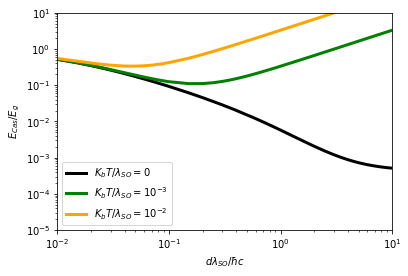

In [99]:
path_casimir = 'casimirenergies'
a = np.append(np.arange(0.01,0.1,0.005),np.append(np.arange(0.1,1,0.05),np.arange(1,11,0.5)))
E1 = np.load(os.path.join(path_casimir, 'G=0.0001Ez=0L=0T=0mu=0.npy'))
#E2 = np.load(os.path.join(path_casimir, 'G=0.0001Ez=0L=0T=0.0001mu=0.npy'))
E3 = np.load(os.path.join(path_casimir, 'G=0.0001Ez=0L=0T=0.001mu=0.npy'))
E4 = np.load(os.path.join(path_casimir, 'G=0.0001Ez=0L=0T=0.01mu=0.npy'))

plt.loglog(a,E1,color='black',linewidth=3,label='$K_bT/\lambda_{SO} = 0$')
#plt.loglog(a,E2,color='blue',linewidth=3,label='$K_bT/\lambda_{SO} = 10^{-4}$')
plt.loglog(a,E3,color='green',linewidth=3,label='$K_bT/\lambda_{SO} = 10^{-3}$')
plt.loglog(a,E4,color='orange',linewidth=3,label='$K_bT/\lambda_{SO} = 10^{-2}$')
plt.xlabel('$d\lambda_{SO}/\hbar c$')
plt.ylabel('$E_{Cas}/E_g$')
plt.legend(loc="lower left")
plt.xlim(0.01,10)
plt.ylim(0.00001,10)

plt.show()